In [68]:
import cv2
import glob
import random
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter

# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')


In [2]:
imgs = '/opt/ml/input/purified/train/'
all_imgs = glob.glob(imgs + '*/*.*')

In [3]:
def contrast(src):
    lab = cv2.cvtColor(src, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8, 8))
    l = clahe.apply(l)

    lab = cv2.merge((l, a, b))
    return cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

def Cent_crop(src):
    center = (src.shape[0] / 2, src.shape[1] / 2)
    w, h = 380, 380
    xx = int(center[1] - w/2)
    yy = int(center[0] - h/2)
    img = src[yy:yy+h, xx:xx+w]
    return cv2.resize(img, (128,128))

In [4]:
from PIL import Image

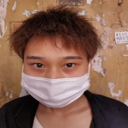

In [67]:
i = random.randint(0,18900)

path = all_imgs[i]

# img = cv2.imread(path)
# print(img.shape)
# img = contrast(img)
img = Image.open(path)
img = img.crop((17,41,367,471))
img = img.resize((128,128))
img.show()



# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# faces = face_cascade.detectMultiScale(gray, 1.09, 4)
# for (x, y, w, h) in faces:
#     cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# imshow(img)

In [521]:
tot = len(all_imgs)
cnt = 0

for im in tqdm(all_imgs):
    img = cv2.imread(im)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    if len(faces) == 1:
        cnt += 1

print(f'{cnt} / {tot}\t{cnt/tot * 100: .2f}')

100%|██████████| 18900/18900 [09:00<00:00, 34.99it/s]

11571 / 18900	 61.22


In [410]:
print('Vanila')
print(f'{cnt} / {tot}\t{cnt/tot * 100: .2f}')

Vanila
13053 / 18900	 69.06


In [411]:
tot = len(all_imgs)
cnt = 0

for im in tqdm(all_imgs):
    img = cv2.imread(im)

    img = Cent_crop(img)
    img = contrast(img)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    if len(faces) != 0:
        cnt += 1

print(f'{cnt} / {tot}\t{cnt/tot * 100: .2f}')

100%|██████████| 18900/18900 [03:16<00:00, 96.35it/s]

14149 / 18900	 74.86


In [520]:
tot = len(all_imgs)
cnt = 0
############잘 잡히게 해서 평균을 구하기 위함.
for im in tqdm(all_imgs):
    img = contrast(Cent_crop(cv2.imread(im)))
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    scale, minN = 1.09, 4
    faces = face_cascade.detectMultiScale(gray, scale, minN)
    
    if len(faces) != 0:    cnt += 1

print(f'param with {scale}, {minN}')
print(f'{cnt} / {tot}\t{cnt/tot * 100: .2f}')

100%|██████████| 18900/18900 [03:21<00:00, 93.59it/s]

param with 1.09, 4
14180 / 18900	 75.03


In [ ]:
cnt_x = Counter()
cnt_y = Counter()
cnt_w = Counter()
cnt_h = Counter()

for im in tqdm(all_imgs):
    img = cv2.imread(im)

    # img = Cent_crop(img)
    img = contrast(img)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.09, 4)
    if len(faces) != 0:
        for (x,y,w,h) in faces:
            cnt_x.update([x])
            cnt_y.update([y])
            cnt_w.update([w])
            cnt_h.update([h])



 49%|████▊     | 9174/18900 [07:12<06:37, 24.46it/s]

In [5]:
xs = []
ys = []
ws = []
hs = []

for im in tqdm(all_imgs):
    img = cv2.imread(im)
    img = contrast(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.09, 4)

    if len(faces) == 1:
        for (x,y,w,h) in faces:
            xs.append(x)
            ys.append(y)
            ws.append(w)
            hs.append(h)

100%|██████████| 18900/18900 [12:33<00:00, 25.07it/s]


In [18]:
import numpy as np

print(f'{len(xs)} / 18900:\t {len(xs)/18900 * 100}%')
x = np.array(xs)
y = np.array(ys)
w = np.array(ws)
h = np.array(hs)

13043 / 18900:	 69.01058201058201%


In [71]:
s = 1.5

print(int(x.mean() - s*x.std()), int(x.mean() + s*x.std()))
print(int(y.mean() - s*y.std()), int(y.mean() + s*y.std()))
print(int(w.mean() - s*w.std()), int(w.mean() + s*w.std()))
print(int(h.mean() - s*h.std()), int(h.mean() + s*h.std()))

35 143
69 235
113 283
113 283


(512, 384, 3)


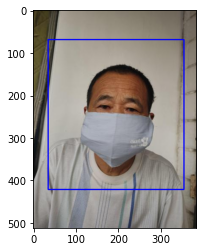

In [89]:
i = random.randint(0,18900)

path = all_imgs[i]

img = cv2.imread(path)
print(img.shape)
# img = contrast(img)



# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# faces = face_cascade.detectMultiScale(gray, 1.09, 4)
# for (x, y, w, h) in faces:
x=35
y=69
w=35+283
h=69+283
cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imshow(img)

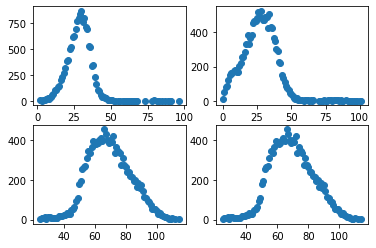

In [419]:
# cnt_test = Counter([1,4,1,2,1,2,3,4,1,3])

fig = plt.figure()
ax_x = fig.add_subplot(2,2,1)
ax_y = fig.add_subplot(2,2,2)
ax_w = fig.add_subplot(2,2,3)
ax_h = fig.add_subplot(2,2,4)

ax_x.scatter(cnt_x.keys(), cnt_x.values())
ax_y.scatter(cnt_y.keys(), cnt_y.values())
ax_w.scatter(cnt_w.keys(), cnt_w.values())
ax_h.scatter(cnt_h.keys(), cnt_h.values())
plt.show()